In [1]:
#
%run ./connector.ipynb
%run ./my_utils.ipynb

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_2797/3132789306.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=127259169819-6jg2fe7gb3mgpj4kog72t599c26uekat.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A55877%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=ZMoDWxJaMoXAwCG5vAndM26JxiwZyu&access_type=offline


In [3]:
#####import datasets######

raw = load_sql('all_purchases.sql')

df_raw = client.query(raw).to_dataframe()

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [277]:
df_raw_sorted = df_raw.sort_values(by=['user_id','purchase_time'])

In [294]:
df_raw_sorted = df_raw_sorted.sort_values(by=['user_id', 'purchase_time'])

df_raw_sorted['cumulative_amount'] = df_raw_sorted.groupby('user_id')['purchase_amount'].cumsum()
df_raw_sorted['signup_to_ftd_time']  = (df_raw_sorted['signup_to_ftd_time'] / 60).round(decimals=0)
df_raw_sorted['days_from_signup_to_purchase'] = (df_raw_sorted['purchase_time'] - df_raw_sorted['signup_date']).dt.days
df_raw_sorted['signup_month'] = df_raw_sorted['signup_date'].dt.to_period('M').astype(str)

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_8850/2423056849.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_raw_sorted['signup_month'] = df_raw_sorted['signup_date'].dt.to_period('M').astype(str)


In [296]:
# label vip

df_raw_sorted['vip_1000'] = df_raw_sorted.apply(lambda x : 1 if x['cumulative_amount'] >= 1000 else 0, axis=1)
df_raw_sorted['vip_3000'] = df_raw_sorted.apply(lambda x : 1 if x['cumulative_amount'] >= 3000 else 0, axis=1)
df_raw_sorted['vip_5000'] = df_raw_sorted.apply(lambda x : 1 if x['cumulative_amount'] >= 5000 else 0, axis=1)
df_raw_sorted['vip_8000'] = df_raw_sorted.apply(lambda x : 1 if x['cumulative_amount'] >= 8000 else 0, axis=1)

In [297]:
vip_1000_list = df_raw_sorted.query("vip_1000==1")['user_id'].unique()
vip_3000_list = df_raw_sorted.query("vip_3000==1")['user_id'].unique()
vip_5000_list = df_raw_sorted.query("vip_5000==1")['user_id'].unique()
vip_8000_list = df_raw_sorted.query("vip_8000==1")['user_id'].unique()

In [298]:
vip_1000 = df_raw_sorted[df_raw_sorted['user_id'].isin(vip_1000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'vip_1000'})

non_vip_1000 = df_raw_sorted[~df_raw_sorted['user_id'].isin(vip_1000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'non_vip_1000'})

vip_3000 = df_raw_sorted[df_raw_sorted['user_id'].isin(vip_3000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'vip_3000'})

non_vip_3000 = df_raw_sorted[~df_raw_sorted['user_id'].isin(vip_3000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'non_vip_3000'})

vip_5000 = df_raw_sorted[df_raw_sorted['user_id'].isin(vip_5000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'vip_5000'})

non_vip_5000 = df_raw_sorted[~df_raw_sorted['user_id'].isin(vip_5000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'non_vip_5000'})

vip_8000 = df_raw_sorted[df_raw_sorted['user_id'].isin(vip_8000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'vip_8000'})

non_vip_8000 = df_raw_sorted[~df_raw_sorted['user_id'].isin(vip_8000_list)].drop_duplicates(
    subset=['user_id','signup_date']).groupby('signup_month')['user_id'].count().to_frame().reset_index().rename(columns={'user_id' : 'non_vip_8000'})

In [300]:
df_merged = pd.merge(vip_1000, non_vip_1000, on='signup_month', how='outer')
df_merged = pd.merge(df_merged, vip_3000, on='signup_month', how='outer')
df_merged = pd.merge(df_merged, non_vip_3000, on='signup_month', how='outer')
df_merged = pd.merge(df_merged, vip_5000, on='signup_month', how='outer')
df_merged = pd.merge(df_merged, non_vip_5000, on='signup_month', how='outer')
df_merged = pd.merge(df_merged, vip_8000, on='signup_month', how='outer')
df_merged = pd.merge(df_merged, non_vip_8000, on='signup_month', how='outer')

# Calculate the percentage of each VIP bucket
def calculate_percentage(row, vip_col, non_vip_col):
    vip_count = row[vip_col] if pd.notna(row[vip_col]) else 0
    non_vip_count = row[non_vip_col] if pd.notna(row[non_vip_col]) else 0
    total = vip_count + non_vip_count
    if total == 0:
        return 0
    return (vip_count / total) 

df_merged['pct_vip_1000'] = df_merged.apply(calculate_percentage, vip_col='vip_1000', non_vip_col='non_vip_1000', axis=1)
df_merged['pct_vip_3000'] = df_merged.apply(calculate_percentage, vip_col='vip_3000', non_vip_col='non_vip_3000', axis=1)
df_merged['pct_vip_5000'] = df_merged.apply(calculate_percentage, vip_col='vip_5000', non_vip_col='non_vip_5000', axis=1)
df_merged['pct_vip_8000'] = df_merged.apply(calculate_percentage, vip_col='vip_8000', non_vip_col='non_vip_8000', axis=1)

# Display the result
df_merged

,signup_month,vip_1000,non_vip_1000,vip_3000,non_vip_3000,vip_5000,non_vip_5000,vip_8000,non_vip_8000,pct_vip_1000,pct_vip_3000,pct_vip_5000,pct_vip_8000
0,2023-12,941,5661,401,6201,269,6333,161,6441,0.142533,0.060739,0.040745,0.024387
1,2024-01,799,5530,360,5969,230,6099,155,6174,0.126244,0.056881,0.036341,0.024490
2,2024-02,846,5195,372,5669,241,5800,172,5869,0.140043,0.061579,0.039894,0.028472
3,2024-03,1146,7176,476,7846,303,8019,196,8126,0.137707,0.057198,0.036410,0.023552
4,2024-04,1213,7923,559,8577,374,8762,251,8885,0.132771,0.061187,0.040937,0.027474
5,2024-05,1303,9073,554,9822,367,10009,222,10154,0.125578,0.053392,0.035370,0.021396
6,2024-06,1487,13176,594,14069,357,14306,203,14460,0.101412,0.040510,0.024347,0.013844
7,2024-07,1353,15672,495,16530,292,16733,181,16844,0.079471,0.029075,0.017151,0.010631


In [306]:
result_vip = df_merged[['signup_month','pct_vip_1000','pct_vip_3000','pct_vip_5000','pct_vip_8000']]
result_vip

,signup_month,pct_vip_1000,pct_vip_3000,pct_vip_5000,pct_vip_8000
0,2023-12,0.142533,0.060739,0.040745,0.024387
1,2024-01,0.126244,0.056881,0.036341,0.024490
2,2024-02,0.140043,0.061579,0.039894,0.028472
3,2024-03,0.137707,0.057198,0.036410,0.023552
4,2024-04,0.132771,0.061187,0.040937,0.027474
5,2024-05,0.125578,0.053392,0.035370,0.021396
6,2024-06,0.101412,0.040510,0.024347,0.013844
7,2024-07,0.079471,0.029075,0.017151,0.010631


In [308]:
df_raw_sorted

,user_id,signup_date,purchase_time,purchase_amount,signup_to_ftd_time,cumulative_amount,days_from_signup_to_purchase,vip_1000,vip_3000,vip_5000,vip_8000,signup_month
90968,34074,2023-12-01 00:18:40.674000+00:00,2023-12-01 13:41:29.648000+00:00,4.99,0.0,4.99,0,0,0,0,0,2023-12
1182532,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 07:56:33.169000+00:00,4.99,11.0,4.99,28,0,0,0,0,2023-12
774012,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 16:13:36.283000+00:00,4.99,11.0,9.98,28,0,0,0,0,2023-12
229037,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:57:45.142000+00:00,4.99,11.0,14.97,29,0,0,0,0,2023-12
910626,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:58:04.530000+00:00,4.99,11.0,19.96,29,0,0,0,0,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...
72155,639169,2024-07-31 23:57:54.618000+00:00,2024-08-01 00:27:22.921000+00:00,15.99,0.0,15.99,0,0,0,0,0,2024-07
1261510,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:22:53.812000+00:00,19.99,0.0,35.98,1,0,0,0,0,2024-07
67189,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:28:55.926000+00:00,9.99,0.0,45.97,1,0,0,0,0,2024-07
1442629,639169,2024-07-31 23:57:54.618000+00:00,2024-08-16 20:33:02.308000+00:00,99.99,0.0,145.96,15,0,0,0,0,2024-07


In [ ]:
# #current definition 
# case
#               when (a.first_week_purchase > 300 or first_day_purchase >= 50) and days_since_install <= 14 and
#                    b.total_purchase_amount >= 2000 then '1'
#               when (a.first_week_purchase > 300 or first_day_purchase >= 50) and days_since_install <= 60 and
#                    b.total_purchase_amount >= 2000 then '2'
#               when b.total_purchase_amount >= 3000 then '3'
#               else 'Irrelevant'

In [312]:
##calculate current definition confustion matrix

df_raw_sorted_14_days = df_raw_sorted[df_raw_sorted['days_from_signup_to_purchase'] <= 14]

In [316]:
df_raw_sorted['a_vip_current'] = df_raw_sorted.apply(
    lambda x: 1 if (x['days_from_signup_to_purchase'] <= 14 and x['cumulative_amount'] >= 2000) and
                  (x['days_from_signup_to_purchase'] <= 7 and x['cumulative_amount'] > 300) or x['first_day_purchase'] >= 50)
                  else 0, axis=1

,user_id,signup_date,purchase_time,purchase_amount,signup_to_ftd_time,cumulative_amount,days_from_signup_to_purchase,vip_1000,vip_3000,vip_5000,vip_8000,signup_month
90968,34074,2023-12-01 00:18:40.674000+00:00,2023-12-01 13:41:29.648000+00:00,4.99,0.0,4.99,0,0,0,0,0,2023-12
1182532,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 07:56:33.169000+00:00,4.99,11.0,4.99,28,0,0,0,0,2023-12
774012,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 16:13:36.283000+00:00,4.99,11.0,9.98,28,0,0,0,0,2023-12
229037,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:57:45.142000+00:00,4.99,11.0,14.97,29,0,0,0,0,2023-12
910626,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:58:04.530000+00:00,4.99,11.0,19.96,29,0,0,0,0,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...
72155,639169,2024-07-31 23:57:54.618000+00:00,2024-08-01 00:27:22.921000+00:00,15.99,0.0,15.99,0,0,0,0,0,2024-07
1261510,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:22:53.812000+00:00,19.99,0.0,35.98,1,0,0,0,0,2024-07
67189,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:28:55.926000+00:00,9.99,0.0,45.97,1,0,0,0,0,2024-07
1442629,639169,2024-07-31 23:57:54.618000+00:00,2024-08-16 20:33:02.308000+00:00,99.99,0.0,145.96,15,0,0,0,0,2024-07


In [271]:
# Calculate first day and first week purchases
df_raw_sorted['first_day_purchase'] = df_raw_sorted[df_raw_sorted['days_from_signup_to_purchase'] == 0].groupby('user_id')['cumulative_amount'].transform('sum')
df_raw_sorted['first_week_purchase'] = df_raw_sorted[df_raw_sorted['days_from_signup_to_purchase'] <= 7].groupby('user_id')['cumulative_amount'].transform('sum')

# Apply condition to calculate a_vip_current
df_raw_sorted['a_vip_current'] = df_raw_sorted.apply(
    lambda x: 1 if (x['days_from_signup_to_purchase'] <= 14 and x['cumulative_amount'] >= 2000) and
                  (x['first_week_purchase'] > 300 or x['first_day_purchase'] >= 50)
                  else 0, axis=1
)

df_raw_sorted['b_vip_current'] = df_raw_sorted.apply(
    lambda x: 1 if (x['days_from_signup_to_purchase'] <= 60 and x['cumulative_amount'] >= 2000) or
                  (x['first_week_purchase'] > 300 or x['first_day_purchase'] >= 50)
                  else 0, axis=1
)

df_raw_sorted['c_vip_current'] = df_raw_sorted.apply(
    lambda row: '1' if row['cumulative_amount'] > 3000 else 0, axis=1
)


# Display the DataFrame with the new column
df_raw_sorted

,user_id,signup_date,purchase_time,purchase_amount,signup_to_ftd_time,cumulative_amount,vip_1000,vip_3000,vip_5000,signup_month,...,is_non_vip_5000,vip_8000,is_vip_8000,is_non_vip_8000,days_from_signup_to_purchase,a_vip_current,first_day_purchase,first_week_purchase,b_vip_current,c_vip_current
90968,34074,2023-12-01 00:18:40.674000+00:00,2023-12-01 13:41:29.648000+00:00,4.99,0.0,4.99,0,0,0,2023-12,...,True,0,False,True,0,0,4.99,4.99,0,0
1182532,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 07:56:33.169000+00:00,4.99,0.0,4.99,0,0,0,2023-12,...,True,0,False,True,28,0,NaN,NaN,0,0
774012,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 16:13:36.283000+00:00,4.99,0.0,9.98,0,0,0,2023-12,...,True,0,False,True,28,0,NaN,NaN,0,0
229037,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:57:45.142000+00:00,4.99,0.0,14.97,0,0,0,2023-12,...,True,0,False,True,29,0,NaN,NaN,0,0
910626,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:58:04.530000+00:00,4.99,0.0,19.96,0,0,0,2023-12,...,True,0,False,True,29,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72155,639169,2024-07-31 23:57:54.618000+00:00,2024-08-01 00:27:22.921000+00:00,15.99,0.0,15.99,0,0,0,2024-07,...,True,0,False,True,0,0,15.99,97.94,0,0
1261510,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:22:53.812000+00:00,19.99,0.0,35.98,0,0,0,2024-07,...,True,0,False,True,1,0,NaN,97.94,0,0
67189,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:28:55.926000+00:00,9.99,0.0,45.97,0,0,0,2024-07,...,True,0,False,True,1,0,NaN,97.94,0,0
1442629,639169,2024-07-31 23:57:54.618000+00:00,2024-08-16 20:33:02.308000+00:00,99.99,0.0,145.96,0,0,0,2024-07,...,True,0,False,True,15,0,NaN,NaN,0,0


In [272]:
df_raw_sorted['any_vip'] = 

,user_id,signup_date,purchase_time,purchase_amount,signup_to_ftd_time,cumulative_amount,vip_1000,vip_3000,vip_5000,signup_month,...,is_non_vip_5000,vip_8000,is_vip_8000,is_non_vip_8000,days_from_signup_to_purchase,a_vip_current,first_day_purchase,first_week_purchase,b_vip_current,c_vip_current
90968,34074,2023-12-01 00:18:40.674000+00:00,2023-12-01 13:41:29.648000+00:00,4.99,0.0,4.99,0,0,0,2023-12,...,True,0,False,True,0,0,4.99,4.99,0,0
1182532,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 07:56:33.169000+00:00,4.99,0.0,4.99,0,0,0,2023-12,...,True,0,False,True,28,0,NaN,NaN,0,0
774012,34077,2023-12-01 00:30:11.924000+00:00,2023-12-29 16:13:36.283000+00:00,4.99,0.0,9.98,0,0,0,2023-12,...,True,0,False,True,28,0,NaN,NaN,0,0
229037,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:57:45.142000+00:00,4.99,0.0,14.97,0,0,0,2023-12,...,True,0,False,True,29,0,NaN,NaN,0,0
910626,34077,2023-12-01 00:30:11.924000+00:00,2023-12-30 05:58:04.530000+00:00,4.99,0.0,19.96,0,0,0,2023-12,...,True,0,False,True,29,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72155,639169,2024-07-31 23:57:54.618000+00:00,2024-08-01 00:27:22.921000+00:00,15.99,0.0,15.99,0,0,0,2024-07,...,True,0,False,True,0,0,15.99,97.94,0,0
1261510,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:22:53.812000+00:00,19.99,0.0,35.98,0,0,0,2024-07,...,True,0,False,True,1,0,NaN,97.94,0,0
67189,639169,2024-07-31 23:57:54.618000+00:00,2024-08-02 01:28:55.926000+00:00,9.99,0.0,45.97,0,0,0,2024-07,...,True,0,False,True,1,0,NaN,97.94,0,0
1442629,639169,2024-07-31 23:57:54.618000+00:00,2024-08-16 20:33:02.308000+00:00,99.99,0.0,145.96,0,0,0,2024-07,...,True,0,False,True,15,0,NaN,NaN,0,0


In [ ]:
# #current definition 
# case
#               when (a.first_week_purchase > 300 or first_day_purchase >= 50) and days_since_install <= 14 and
#                    b.total_purchase_amount >= 2000 then '1'
#               when (a.first_week_purchase > 300 or first_day_purchase >= 50) and days_since_install <= 60 and
#                    b.total_purchase_amount >= 2000 then '2'
#               when b.total_purchase_amount >= 3000 then '3'
#               else 'Irrelevant'

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_8850/3254706438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_vip['signup_month'] = result_vip['signup_month'].astype(str)


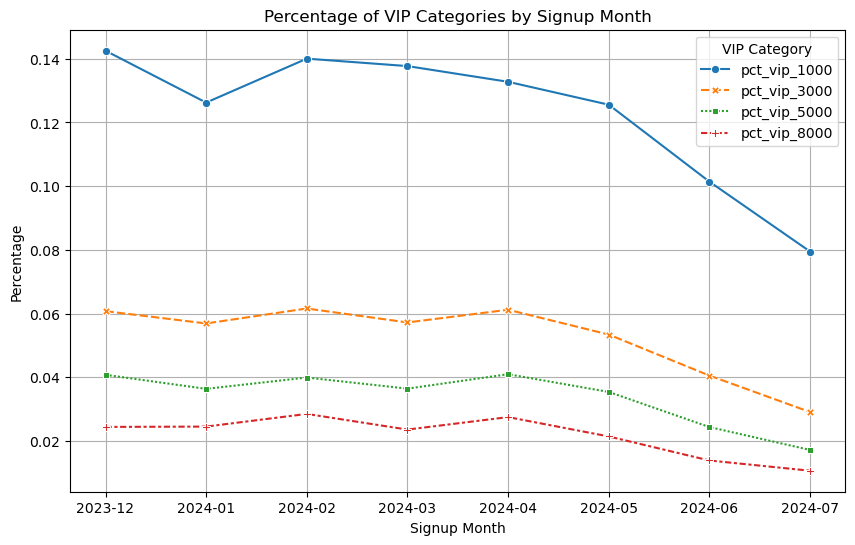

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'signup_month' is a string
result_vip['signup_month'] = result_vip['signup_month'].astype(str)

# Melt the DataFrame
df_melted = result_vip.melt(id_vars='signup_month', 
                            value_vars=['pct_vip_1000', 'pct_vip_3000', 'pct_vip_5000', 'pct_vip_8000'], 
                            var_name='VIP_category', 
                            value_name='percentage')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='signup_month', y='percentage', hue='VIP_category', style='VIP_category', markers=True)

# Add labels and title
plt.xlabel('Signup Month')
plt.ylabel('Percentage')
plt.title('Percentage of VIP Categories by Signup Month')
plt.legend(title='VIP Category')
plt.grid(True)

# Show plot
plt.show()

In [263]:
##calculate current logic for tier A
df_raw_sorted['days_from_signup_to_purchase'] = (df_raw_sorted['purchase_time'] - df_raw_sorted['signup_date']).dt.days

# Calculate first day and first week purchases
df_raw_sorted['first_day_purchase'] = df_raw_sorted[df_raw_sorted['days_from_signup_to_purchase'] == 0].groupby('user_id')['cumulative_amount'].transform('sum')
df_raw_sorted['first_week_purchase'] = df_raw_sorted[df_raw_sorted['days_from_signup_to_purchase'] <= 7].groupby('user_id')['cumulative_amount'].transform('sum')

# Apply condition to calculate a_vip_current
df_raw_sorted['a_vip_current'] = df_raw_sorted.apply(
    lambda x: 1 if (x['days_from_signup_to_purchase'] <= 14 and x['cumulative_amount'] >= 2000) and
                  (x['first_week_purchase'] > 300 or x['first_day_purchase'] >= 50)
                  else 0, axis=1
)


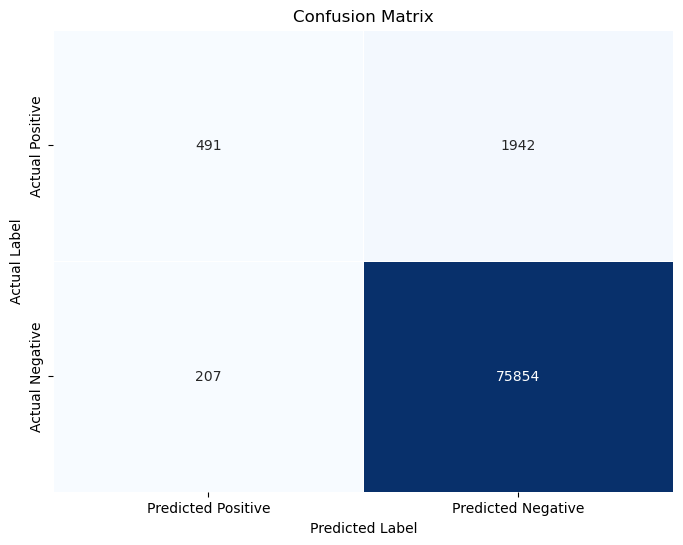

Accuracy: 0.97
Recall: 0.20


In [265]:
vip_current_users = set(df_raw_sorted[df_raw_sorted['a_vip_current'] == 1]['user_id'])

# Unique user_ids where `is_vip_5000 = True`
vip_5000_users = set(df_raw_sorted[df_raw_sorted['is_vip_5000'] == True]['user_id'])

# Calculate confusion matrix components
true_positives = len(vip_current_users & vip_5000_users)
false_positives = len(vip_current_users - vip_5000_users)
false_negatives = len(vip_5000_users - vip_current_users)
true_negatives = len(set(df_raw_sorted['user_id']) - vip_current_users - vip_5000_users)

# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)

# Calculate Recall
recall = true_positives / (true_positives + false_negatives)

# Create confusion matrix DataFrame
confusion_matrix = pd.DataFrame({
    'Predicted Positive': [true_positives, false_positives],
    'Predicted Negative': [false_negatives, true_negatives]
}, index=['Actual Positive', 'Actual Negative'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Output accuracy and recall
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")

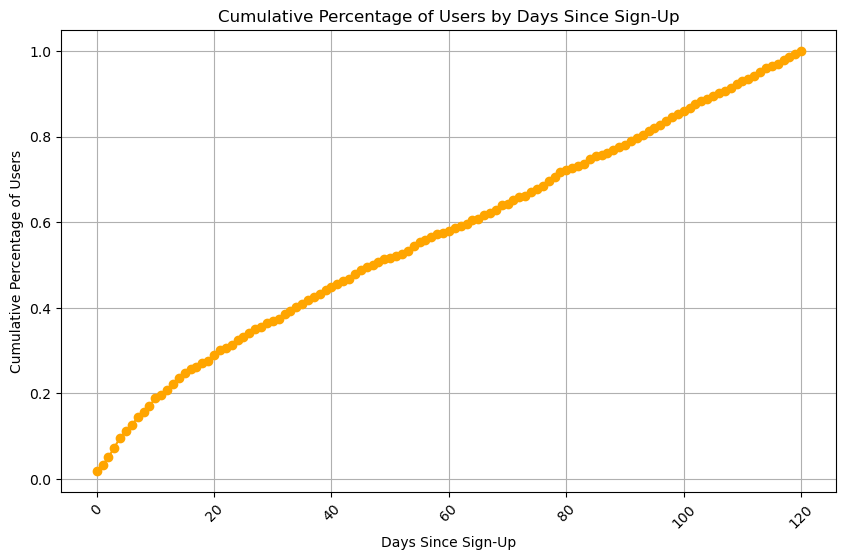

In [145]:
##time to convert

plt.figure(figsize=(10, 6))
plt.plot(counts_df['days_since_su'], counts_df['pct'], marker='o', color='orange')
plt.xlabel('Days Since Sign-Up')
plt.ylabel('Cumulative Percentage of Users')
plt.title('Cumulative Percentage of Users by Days Since Sign-Up')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [557]:
df_raw_sorted = df_raw_sorted[df_raw_sorted['signup_date'] < '2024-07-01']

df_raw_sorted_60d = df_raw_sorted[df_raw_sorted['days_from_signup_to_purchase'] <= 60]

df_raw_sorted_60d_agg = df_raw_sorted_60d.groupby(['user_id', 'days_from_signup_to_purchase'])['cumulative_amount'].max().reset_index()

In [705]:
df_raw_sorted['signup_date'].min()

Timestamp('2023-12-01 00:18:40.674000+0000', tz='UTC')

In [561]:
user_ids = df_raw_sorted_60d_agg['user_id'].unique()
days_range = list(range(0, 61))  # Days from 0 to 30

# Create a cartesian product of user_ids and days_range
all_combinations = pd.MultiIndex.from_product([user_ids, days_range], names=['user_id', 'days_from_signup_to_purchase']).to_frame(index=False)

# Merge with existing DataFrame
df_complete_60 = pd.merge(all_combinations, df_raw_sorted_60d_agg, on=['user_id', 'days_from_signup_to_purchase'], how='left')

# Forward fill missing cumulative_amount values
df_complete_60['cumulative_amount'] = df_complete_60.groupby('user_id')['cumulative_amount'].fillna(method='ffill')

df_complete_60['cumulative_amount'] = df_complete_60['cumulative_amount'].fillna(0)

df_complete_max30 = df_complete_60[df_complete_60['days_from_signup_to_purchase'] == 30]

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_8850/3933522351.py:11: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_complete_60['cumulative_amount'] = df_complete_60.groupby('user_id')['cumulative_amount'].fillna(method='ffill')
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_8850/3933522351.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_complete_60['cumulative_amount'] = df_complete_60.groupby('user_id')['cumulative_amount'].fillna(method='ffill')


,user_id,days_from_signup_to_purchase,cumulative_amount
30,34074,30,4.99
91,34077,30,19.96
152,34083,30,19.99
213,34090,30,9.98
274,34097,30,199.98
...,...,...,...
2892284,527933,30,19.99
2892345,527943,30,75.96
2892406,527944,30,15.99
2892467,527946,30,49.95


In [565]:
thresholds = [100, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000]

results = {'threshold': [], 'count_exceeding': [], 'percentage_cumulative_sum': [], 'total_users': [], 'percentage_exceeding': []}

total_cumulative_amount = df_complete_max30['cumulative_amount'].sum()

total_users = df_complete_max30['user_id'].nunique()

for threshold in thresholds:
    exceeding_users = df_complete_max30[df_complete_max30['cumulative_amount'] > threshold]['user_id'].unique()
    
    cumulative_sum_exceeding = df_complete_max30[df_complete_max30['user_id'].isin(exceeding_users)]['cumulative_amount'].sum()
    
    percentage_cumulative_sum = (cumulative_sum_exceeding / total_cumulative_amount)  if total_cumulative_amount > 0 else 0
    
    count_exceeding = len(exceeding_users)
    percentage_exceeding = (count_exceeding / total_users) if total_users > 0 else 0
    
    results['threshold'].append(threshold)
    results['count_exceeding'].append(count_exceeding)
    results['total_users'].append(total_users)
    results['percentage_exceeding'].append(percentage_exceeding)
    results['percentage_cumulative_sum'].append(percentage_cumulative_sum)

results_df = pd.DataFrame(results)

results_df

,threshold,count_exceeding,percentage_cumulative_sum,total_users,percentage_exceeding
0,100,11784,0.951701,47419,0.248508
1,200,8365,0.920113,47419,0.176406
2,500,4920,0.849498,47419,0.103756
3,1000,2999,0.762397,47419,0.063245
4,1500,2151,0.695114,47419,0.045362
5,2000,1442,0.619417,47419,0.030410
6,3000,964,0.544162,47419,0.020329
7,4000,718,0.489498,47419,0.015142
8,5000,545,0.440301,47419,0.011493


In [689]:
df_compared_30 = df_complete_60[df_complete_60['days_from_signup_to_purchase']==30]
df_compared_60 = df_complete_60[df_complete_60['days_from_signup_to_purchase']==60]

In [603]:
df_merged_comp = df_compared_30.merge(df_compared_60,on=['user_id'])[['user_id','cumulative_amount_x','cumulative_amount_y']].rename(columns=
    {'cumulative_amount_x':'amount_after_30d', 'cumulative_amount_y':'amount_after_60d'})

In [693]:
df_merged_comp['30d_1000'] = df_merged_comp.apply(lambda x : 1 if x['amount_after_30d'] >= 1000 else 0, axis=1)
df_merged_comp_1000 = df_merged_comp[df_merged_comp['30d_1000'] ==1]

In [697]:
df_merged_comp_1000['diff_30d_60d'] = df_merged_comp_1000['amount_after_60d'] - df_merged_comp_1000['amount_after_30d']

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_8850/3373333849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_comp_1000['diff_30d_60d'] = df_merged_comp_1000['amount_after_60d'] - df_merged_comp_1000['amount_after_30d']


In [699]:
bins = [0,10 ,200, 400, 500, 1000, 1500, np.inf]

labels = ['0-10','11-200' ,'201-400', '401-500', '501-1000', '1001-1500', '1500+']

df_merged_comp_1000['bins'] = pd.cut(df_merged_comp_1000['diff_30d_60d'], bins=bins, labels=labels, right=False)

df_merged_comp_1000['bins'].value_counts()

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_8850/3089051023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_comp_1000['bins'] = pd.cut(df_merged_comp_1000['diff_30d_60d'], bins=bins, labels=labels, right=False)


bins
0-10         1064
1500+         963
501-1000      290
11-200        222
1001-1500     206
201-400       181
401-500        73
Name: count, dtype: int64

In [653]:
#check recall
df_vip_5000_check = df_raw_sorted[df_raw_sorted['user_id'].isin(vip_5000_list)]

df_vip_5000_check = df_vip_5000_check[df_vip_5000_check['days_from_signup_to_purchase'] <= 30]

In [667]:
df_vip_5000_check_dist = df_vip_5000_check.groupby(['user_id'])['cumulative_amount'].max().to_frame().reset_index()

In [673]:
df_vip_5000_check_dist

,user_id,cumulative_amount
0,34097,199.98
1,34784,494.59
2,34808,1114.22
3,34982,4794.16
4,35121,5324.46
...,...,...
1884,526793,6996.38
1885,527095,19140.94
1886,527246,305.93
1887,527257,9786.60


In [685]:
count_above_1000 = df_vip_5000_check_dist[df_vip_5000_check_dist['cumulative_amount'] >= 1000].shape[0]
count_above_1000/df_vip_5000_check_dist.shape[0]

0.6892535733192166

In [711]:
false_positive = ['11237', '13961']
True_negative = ['14987', '15155']

df_raw_sorted[df_raw_sorted['user_id'].isin(false_positive)]

,user_id,signup_date,purchase_time,purchase_amount,signup_to_ftd_time,cumulative_amount,days_from_signup_to_purchase,vip_1000,vip_3000,vip_5000,vip_8000,signup_month
